# 2장. Prophet 시작

## 간단한 Prophet 모델 구축(Building a simple model in Prophet)

#매 ipynb 파일 실행 시 구글 드라이브 연동(mounting)을 시행합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/co2-ppm-daily_csv.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

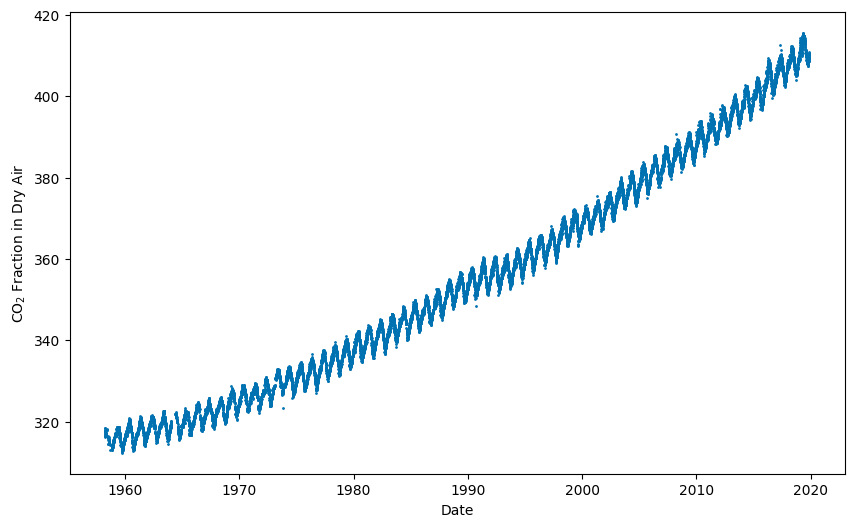

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'], s=1, c='#0072B2')
plt.xlabel('Date')
plt.ylabel(r'CO$_2$ Fraction in Dry Air')
plt.show()

In [ ]:
# 런타임 20초
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3l4n2mk/w26yj1ux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq3l4n2mk/4wn_52wl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6591', 'data', 'file=/tmp/tmpq3l4n2mk/w26yj1ux.json', 'init=/tmp/tmpq3l4n2mk/4wn_52wl.json', 'output', 'file=/tmp/tmpq3l4n2mk/prophet_models9adjj51/prophet_model-20250706020631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:06:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365 * 10)
forecast = model.predict(future)

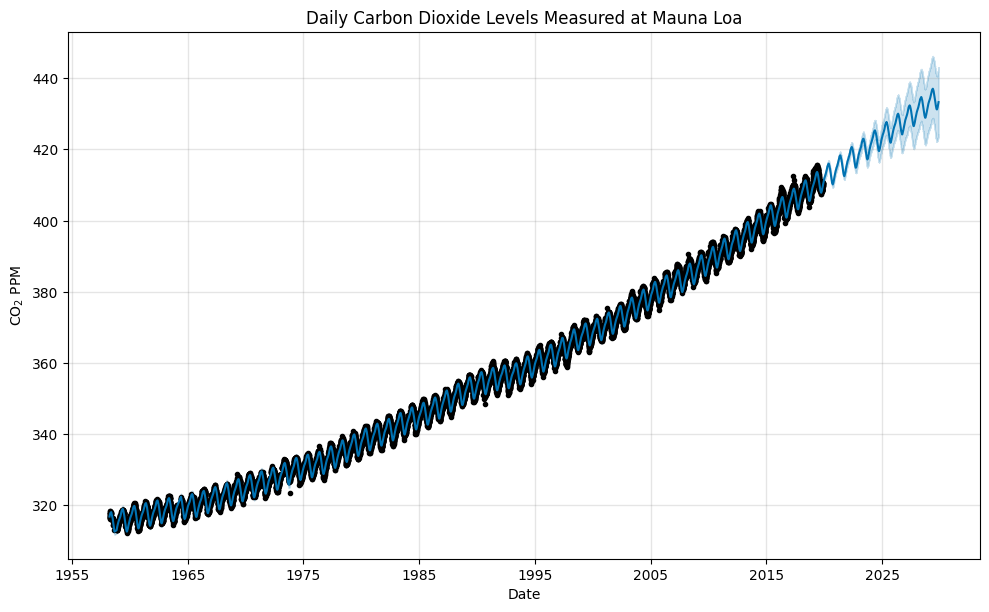

In [ ]:
fig = model.plot(forecast, xlabel='Date', ylabel=r'CO$_2$ PPM')
plt.title('Daily Carbon Dioxide Levels Measured at Mauna Loa')
plt.show()

## 예측 데이터프레임 해석(Interpreting the forecast DataFrame)

In [ ]:
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.87681,314.879212,314.884015
yhat_lower,316.037787,316.018493,316.162853
yhat_upper,317.662189,317.788994,317.913206
trend_lower,314.87681,314.879212,314.884015
trend_upper,314.87681,314.879212,314.884015
additive_terms,1.985679,2.015663,2.118861
additive_terms_lower,1.985679,2.015663,2.118861
additive_terms_upper,1.985679,2.015663,2.118861
weekly,0.003257,-0.010815,0.003454


## 구성 요소 플롯의 이해(Understanding components plots)

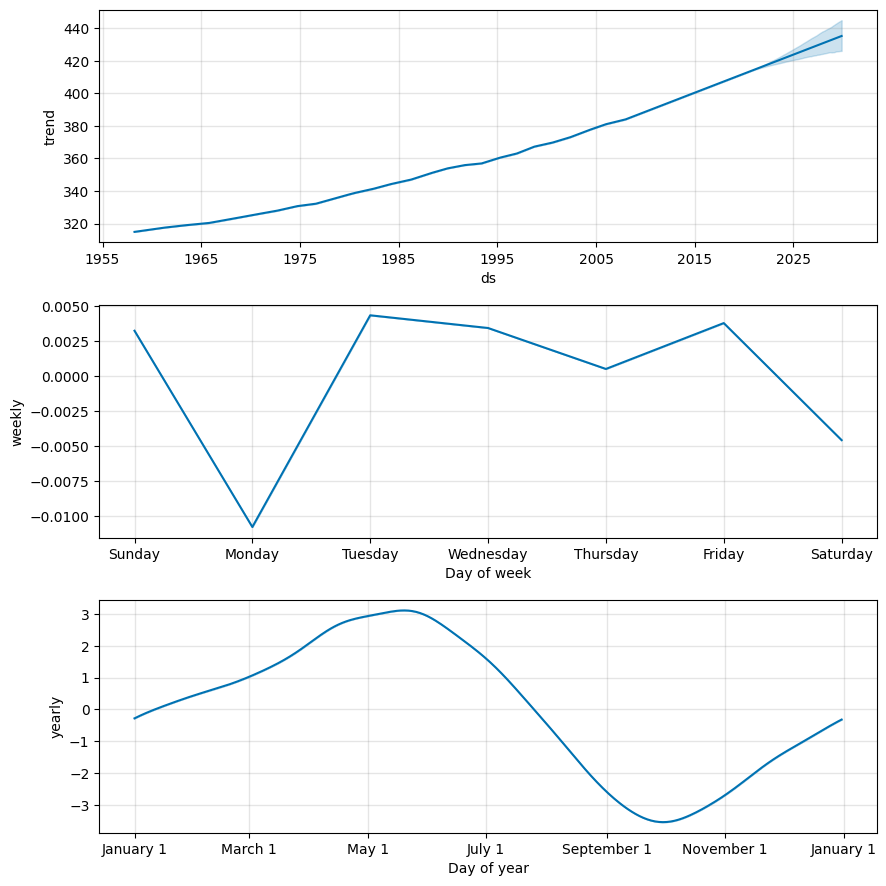

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
### 이하 원서 코드 중에서 콘다 실행 분 (코랩에서는 실행하지 마세요.)
conda install gcc
conda install -c conda-forge prophet